### Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read and explore Data.csv

In [2]:
df = pd.read_csv("data/Data.csv")
df.head()

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,"2,024.00",0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,"2,024.00",3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,"2,024.00",4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,"2,024.00",2.41,-4.33


In [3]:
df.dtypes

Date                         object
Target_Name                  object
Target_Industry_Marco        object
Target_Industry_Mid          object
Target_Nation                object
Buyer_Name                   object
Buyer_Industry_Macro         object
Buyer_Industry_Mid           object
Buyer_Nation                 object
Target_Revenues              object
Target_EBITDA                object
Target_EV                    object
Target_Industry_Detailed     object
Target_Status                object
Year                         object
EV_Rev                      float64
EV_EBITDA                   float64
dtype: object

In [9]:
df.shape

(14775, 17)

### Counts of countries

In [4]:
count_df = df['Buyer_Nation'].value_counts().reset_index()

In [11]:
count_df.columns = ['Buyer_Nation', 'Count']
count_df

,Buyer_Nation,Count
0,United States,4377
1,Canada,1506
2,Unknown,1073
3,United Kingdom,986
4,France,871
...,...,...
89,Angola,1
90,Ivory Coast,1
91,Puerto Rico,1
92,Netherlands Antilles,1


### Counts of target industry macro

In [7]:
target_macro_df = df['Target_Industry_Marco'].value_counts().reset_index()
target_macro_df.columns = ['Target_Industry_Marco', 'Count']
target_macro_df

,Target_Industry_Marco,Count
0,High Technology,2372
1,Financials,2226
2,Industrials,1785
3,Energy and Power,1366
4,Healthcare,1339
5,Materials,1257
6,Consumer Products and Services,1015
7,Media and Entertainment,818
8,Real Estate,794
9,Consumer Staples,783


- **Suggestion:** Remove 'Goverment and Agencies'

In [10]:
filtered_df = df[df['Target_Industry_Marco'] != 'Government and Agencies']
filtered_df.shape

(14768, 17)

### Counts of buyer industry macro

In [12]:
buyer_macro_df = df['Buyer_Industry_Macro'].value_counts().reset_index()
buyer_macro_df.columns = ['Buyer_Industry_Macro', 'Count']
buyer_macro_df

,Buyer_Industry_Macro,Count
0,Financials,6900
1,High Technology,1323
2,Industrials,1190
3,Energy and Power,883
4,Healthcare,788
5,Materials,774
6,Consumer Products and Services,712
7,Real Estate,548
8,Media and Entertainment,529
9,Consumer Staples,453


### Counts of buyer name

In [13]:
buyer_name_df = df['Buyer_Name'].value_counts().reset_index()
buyer_name_df.columns = ['Buyer_Name', 'Count']
buyer_name_df

,Buyer_Name,Count
0,Undisclosed Acquiror,1073
1,Investor Group,628
2,Creditors,60
3,Shareholders,36
4,Brookfield Asset Management Inc,21
...,...,...
8811,Ioannis Stroutsi,1
8812,Rockhopper Exploration PLC,1
8813,Ahlstrom Capital Oy,1
8814,West End Indiana Bancshares Inc,1


- **Suggestion:** Ignore this column

### Counts of Target_Status

In [14]:
target_status_df = df['Target_Status'].value_counts().reset_index()
target_status_df.columns = ['Target_Status', 'Count']
target_status_df

,Target_Status,Count
0,Public,12751
1,Private,2022


### Counts of Year

In [16]:
year_df = df['Year'].value_counts().reset_index()
year_df.columns = ['Year', 'Count']
year_df

,Year,Count
0,"2,021.00",1639
1,"2,022.00",1519
2,"2,015.00",1496
3,"2,014.00",1428
4,"2,017.00",1405
5,"2,020.00",1339
6,"2,018.00",1327
7,"2,016.00",1314
8,"2,023.00",1306
9,"2,019.00",1298


- **Suggestion:** Change dtype of this column to *int*

### Histogram of EV_Rev

<AxesSubplot:>

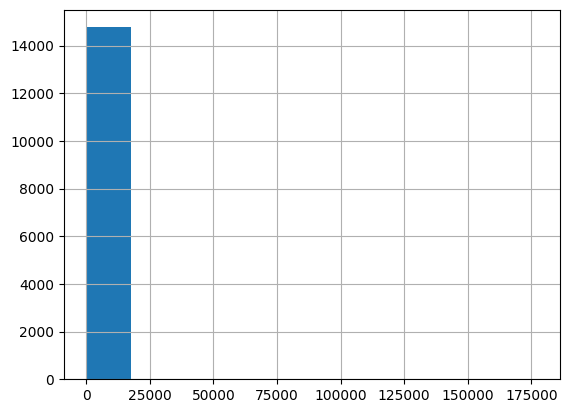

In [34]:
df['EV_Rev'].hist()

In [24]:
print('Maximum EV_Rev:', max(df['EV_Rev']))

Maximum EV_Rev: 177258.47


In [25]:
df['EV_Rev'].nlargest(10)

13139    177258.47
14063     31897.38
11414     21793.62
10732     19569.00
13732     14373.77
11817     13532.19
11112     10720.43
13058     10442.11
12628      6711.72
12639      5962.85
Name: EV_Rev, dtype: float64

In [27]:
df['EV_Rev'].describe()

count     14775.000000
mean         35.522665
std        1521.053799
min           0.000000
25%           0.920000
50%           2.260000
75%           5.905000
max      177258.470000
Name: EV_Rev, dtype: float64

- **Comment**: The data has a huge positive skew

#### Find the largest outliers

In [39]:
outliers = df[df['EV_Rev'] > 5000]
outliers

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
10732,16/02/2023,Tikehau Capital Advisors SAS,Financials,Asset Management,France,Societe Familiale Dinvestissements SAS,Financials,Other Financials,Luxembourg,0.25,-13.45,"4,911.82",Investment & Commodity Firms/Dealers/Exchanges,Private,"2,023.00",19569.00,-365.11
11112,23/08/2021,Trillium Therapeutics Inc,Healthcare,Biotechnology,Canada,Pfizer Inc,Healthcare,Pharmaceuticals,United States,0.14,-77.93,"1,466.55",Drugs,Public,"2,021.00",10720.43,-18.82
11414,05/10/2020,Eidos Therapeutics Inc,Healthcare,Biotechnology,United States,BridgeBio Pharma Inc,Healthcare,Biotechnology,United States,0.11,-84.94,"2,362.00",Drugs,Public,"2,020.00",21793.62,-27.81
11817,18/10/2018,Endocyte Inc,Healthcare,Pharmaceuticals,United States,Novartis AG,Healthcare,Pharmaceuticals,Switzerland,0.11,-36.89,"1,503.83",Drugs,Public,"2,018.00",13532.19,-40.77
12628,17/06/2015,KYTHERA Biopharmaceuticals Inc,Healthcare,Pharmaceuticals,United States,Allergan Inc,Healthcare,Pharmaceuticals,United States,0.26,-96.57,"1,735.95",Drugs,Public,"2,015.00",6711.72,-17.98
12639,04/06/2015,Fivory SAS,High Technology,Software,France,Total SA,Energy and Power,Oil & Gas,France,0.17,-9.11,"1,013.69",Prepackaged Software,Private,"2,015.00",5962.85,-111.30
13058,19/03/2024,Realia Business SA,Real Estate,Other Real Estate,Spain,Investor Group,Financials,Other Financials,Spain,152.24,58.71,"1,589,727.15",Real Estate; Mortgage Bankers and Brokers,Public,"2,024.00",10442.11,27075.78
13139,09/08/2023,1stdibs.com Inc,High Technology,E-commerce / B2B,United States,1stdibs.com Inc,High Technology,E-commerce / B2B,United States,81.38,-31.66,"14,425,195.75",Business Services,Public,"2,023.00",177258.47,-455576.59
13732,31/01/2020,Millrock Resources Inc,Materials,Metals & Mining,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.78,-1.36,"11,157.52",Mining,Public,"2,020.00",14373.77,-8232.32
14063,31/01/2018,MoneyOnMobile Inc,Retail,Internet and Catalog Retailing,United States,Gruppa kompanii S 7 ZAO,Industrials,Transportation & Infrastructure,Russia,5.71,-8.83,"181,981.79",Business Services,Public,"2,018.00",31897.38,-20610.43


- Look at "Realia Business SA' having a very large Target_EV

##### Find how many rows have very high EV_Rev (above 20)

In [41]:
high_EV_rev = df[df['EV_Rev'] > 20]
high_EV_rev

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
18,04/07/2024,Bevcanna Enterprises Inc,Consumer Staples,Food and Beverage,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.14,-4.17,8.11,Food and Kindred Products,Public,"2,024.00",56.68,-1.94
59,24/05/2024,Promino Nutritional Sciences Inc,Healthcare,Pharmaceuticals,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.29,-4.27,9.10,Drugs,Public,"2,024.00",30.85,-2.13
72,06/05/2024,RevoluGROUP Canada Inc,High Technology,Software,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.34,-2.35,7.45,Prepackaged Software,Public,"2,024.00",21.63,-3.17
73,04/05/2024,Bevcanna Enterprises Inc,Consumer Staples,Food and Beverage,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.14,-4.17,8.90,Food and Kindred Products,Public,"2,024.00",62.19,-2.13
74,01/05/2024,MedX Health Corp,Healthcare,Healthcare Equipment & Supplies,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,0.35,-2.02,16.69,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",47.43,-8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14638,30/09/2014,Paris Realty Fund SA,Real Estate,Real Estate Management & Development,France,Paris Realty Fund SA,Real Estate,Real Estate Management & Development,France,22.18,10.57,"5,642.20",Real Estate; Mortgage Bankers and Brokers,Public,"2,014.00",254.41,534.00
14655,24/08/2014,InterMune Inc,Healthcare,Biotechnology,United States,Roche Holding AG,Healthcare,Pharmaceuticals,Switzerland,81.38,-154.69,"6,032.92",Drugs,Public,"2,014.00",74.13,-39.00
14695,02/06/2014,European Islamic Investment Bank PLC,Financials,Brokerage,United Kingdom,European Islamic Investment Bank PLC,Financials,Brokerage,United Kingdom,12.26,2.01,"6,027.81",Investment & Commodity Firms/Dealers/Exchanges,Public,"2,014.00",491.54,2993.03
14736,18/03/2014,Boursorama SA,High Technology,Internet Software & Services,France,Investor Group,Financials,Other Financials,France,194.84,69.81,"5,715.93",Business Services,Public,"2,014.00",29.34,81.88


In [47]:
high_EV_rev = df[df['EV_Rev'] > 1000]
high_EV_rev

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
5699,03/03/2023,Zero SRL,Consumer Staples,Agriculture & Livestock,Italy,Mitsui & Co Ltd,Consumer Products and Services,Other Consumer Products,Japan,0.11,-0.06,187.41,"Agriculture, Forestry, and Fishing",Private,"2,023.00",1643.92,-2928.23
6758,05/02/2018,Liberty Health Sciences Inc,Healthcare,Pharmaceuticals,United States,Investor Group,Financials,Other Financials,United States,0.17,-2.63,224.45,Drugs,Public,"2,018.00",1315.96,-85.43
7007,19/01/2017,Lithium Americas Corp,Materials,Metals & Mining,Canada,BCP Innovation Pte Ltd,Energy and Power,Oil & Gas,Singapore,0.15,-9.25,170.52,Mining,Public,"2,017.00",1127.63,-18.43
7009,17/01/2017,Lithium Americas Corp,Materials,Metals & Mining,Canada,GFL International Co Ltd,Materials,Metals & Mining,China (Mainland),0.15,-9.25,173.35,Mining,Public,"2,017.00",1146.32,-18.74
7437,17/03/2015,Ignyta Inc,Healthcare,Pharmaceuticals,United States,Teva Pharmaceutical Industries Ltd,Healthcare,Pharmaceuticals,Israel,0.12,-32.50,138.76,Drugs,Public,"2,015.00",1119.08,-4.27
7978,20/06/2023,Looking Glass Labs Ltd,High Technology,Software,Canada,Global Auto Holdings Ltd,Financials,Other Financials,United Kingdom,0.19,-5.31,344.48,Prepackaged Software,Public,"2,023.00",1773.72,-64.88
8376,09/12/2021,Renewcell AB,Consumer Staples,Textiles & Apparel,Sweden,Investor Group,Financials,Other Financials,Sweden,0.17,-7.99,683.19,Textile and Apparel Products,Public,"2,021.00",4083.51,-85.49
8379,08/12/2021,Passworks S.A,High Technology,Software,Portugal,Fobi AI Inc,High Technology,Software,Canada,0.16,-0.04,549.99,Prepackaged Software,Private,"2,021.00",3503.10,-13414.29
8488,19/07/2021,Gelesis Inc,Healthcare,Pharmaceuticals,United States,Capstar Special Purpose Acquisition Corp,Financials,Alternative Financial Investments,United States,0.17,-6.50,587.34,Drugs,Private,"2,021.00",3399.53,-90.39
8501,08/07/2021,Hyperfine Inc,Healthcare,Healthcare Equipment & Supplies,United States,HealthCor Catalio Acquisition Corp,Financials,Alternative Financial Investments,United States,0.24,-19.00,443.16,"Measuring, Medical, Photo Equipment; Clocks",Private,"2,021.00",1840.91,-23.33


In [49]:
#Count EV_Rev > 1000
high_EV_rev.shape

(42, 17)

### Histogram of EV_EBITDA

<AxesSubplot:>

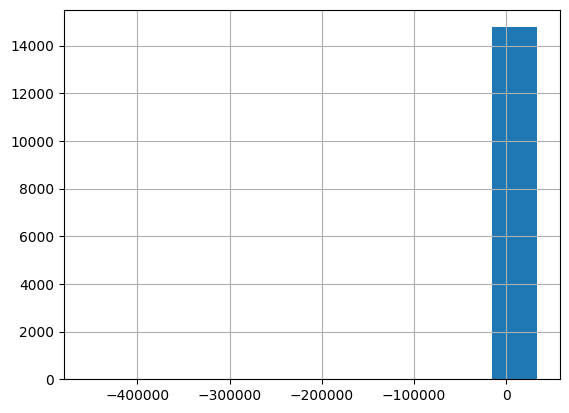

In [28]:
df['EV_EBITDA'].hist()

In [29]:
df['EV_EBITDA'].nlargest(10)

14317    33655.51
13058    27075.78
6508     24826.14
4517     16736.61
11998    13884.01
13528    10402.08
5185      8825.73
14292     8660.42
3641      8034.20
11254     8008.52
Name: EV_EBITDA, dtype: float64

In [30]:
df['EV_EBITDA'].nsmallest(10)

13139   -455576.59
10469    -91232.65
9235     -27581.96
14063    -20610.43
12600    -13688.70
8379     -13414.29
2839      -9796.00
6214      -8623.98
13732     -8232.32
4985      -6132.93
Name: EV_EBITDA, dtype: float64

In [35]:
df['EV_EBITDA'].describe()

count     14775.000000
mean        -23.038071
std        3871.775931
min     -455576.590000
25%           1.780000
50%           8.330000
75%          16.175000
max       33655.510000
Name: EV_EBITDA, dtype: float64

In [37]:
row = df[df['EV_EBITDA'] < -400000]
row

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
13139,09/08/2023,1stdibs.com Inc,High Technology,E-commerce / B2B,United States,1stdibs.com Inc,High Technology,E-commerce / B2B,United States,81.38,-31.66,"14,425,195.75",Business Services,Public,"2,023.00",177258.47,-455576.59


- 1stdibs outlier is likely because Target_EV is written in euros instead of millions of euros

In [50]:
high_EV_EBITDA = df[df['EV_EBITDA'] > 100]
high_EV_EBITDA

,Date,Target_Name,Target_Industry_Marco,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
84,15/04/2024,SHS Viveon AG,High Technology,Software,Germany,Sidetrade SA,High Technology,Software,France,8.85,0.04,5.50,Prepackaged Software,Public,"2,024.00",0.62,141.07
85,15/04/2024,SHS Viveon AG,High Technology,Software,Germany,Sidetrade SA,High Technology,Software,France,8.85,0.04,5.50,Prepackaged Software,Public,"2,024.00",0.62,141.07
117,06/03/2024,Locovet Srl,Consumer Products and Services,Professional Services,Italy,Ca Zampa Srl,Consumer Products and Services,Professional Services,Italy,0.12,0.02,2.11,"Agriculture, Forestry, and Fishing",Private,"2,024.00",17.87,110.97
121,01/03/2024,Boardeaser AB,High Technology,IT Consulting & Services,Sweden,Fortnox AB,High Technology,Software,Sweden,1.48,0.07,14.38,Business Services,Private,"2,024.00",9.75,219.76
161,10/01/2024,GL Industry SpA,Consumer Staples,Food and Beverage,Italy,DDC Enterprise Ltd,Consumer Staples,Food and Beverage,Hong Kong,6.61,0.08,16.70,Food and Kindred Products,Private,"2,024.00",2.53,222.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,18/09/2014,Bank of Cyprus PCL,Financials,Banks,Cyprus,European Bank For Reconstruction & Development,Government and Agencies,Supranational,United Kingdom,"2,163.98",155.49,"32,772.54","Commercial Banks, Bank Holding Companies",Public,"2,014.00",15.14,210.77
14668,25/07/2014,Sky Deutschland AG,Media and Entertainment,Cable,Germany,Kronen tausend985 GmbH,Media and Entertainment,Cable,Germany,"1,696.57",9.05,"6,342.47",Radio and Television Broadcasting Stations,Public,"2,014.00",3.74,700.67
14695,02/06/2014,European Islamic Investment Bank PLC,Financials,Brokerage,United Kingdom,European Islamic Investment Bank PLC,Financials,Brokerage,United Kingdom,12.26,2.01,"6,027.81",Investment & Commodity Firms/Dealers/Exchanges,Public,"2,014.00",491.54,2993.03
14704,12/05/2014,Sky Deutschland AG,Media and Entertainment,Cable,Germany,Kronen tausend985 GmbH,Media and Entertainment,Cable,Germany,"1,696.57",9.05,"6,706.39",Radio and Television Broadcasting Stations,Public,"2,014.00",3.95,740.87
